In [3]:
import underworld as uw
import matplotlib as mpl
from matplotlib.figure import Figure
import matplotlib.pyplot as pyplot
import numpy as np
import math
import h5py
import glob
import UWGeodynamics as GEO
from MechanicalProperties import PlateProperties
from pathlib import Path
import sys
import underworld.function as fn
#import glucifer
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as pypl
u = GEO.UnitRegistry

loaded rc file /opt/venv/lib/python3.7/site-packages/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [4]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [5]:
#PlateProperties(Nlayers,crustThickness,crustDensity,mantleDensity,plateThickness,oceanic,age, cohesion,friction,arc,arcDensity,arcThickness,depthToMantle)
#Oceanic Plate
data1=PlateProperties(4,7.,2900.,3400.,100.,True,80.,12.5,12.5,0.066,0.033,False,0.,0.,100.,2.)
#Cratonic continental - Values can be +5MPa!!
data3=PlateProperties(2,40.,2700.,3400.,150.,False,80.,15.,20.,0.15,0.08,False,0.,0.,150.,.2)
#Continental plate
data2=PlateProperties(2,20.,2800.,3400.,100.,False,80.,10.,15.,0.01,0.005,False,0.,0.,80.,2.) #the last specifies how much was extended the lithosphere
#Arc Crust - 25 km
data4=PlateProperties(4,7.,2900.,3400.,100.,True,80.,12.5,15.,0.066,0.033,True,2838.,25.,100.,1.)
#Arc Crust - 35 km
data5=PlateProperties(4,7.,2900.,3400.,100.,True,80.,12.5,15.,0.066,0.033,True,2838.,32.,100.,1.)
#Arcc Crust - 28 km
data6=PlateProperties(4,7.,2900.,3400.,100.,True,80.,12.5,15.,0.066,0.033,True,2838.,35.,100.,1.)

In [6]:
#Data- SP - OP weak -OP strong Arc 25 Arc 35
layers=(data1[8][3],data3[8][3],data2[8][3],data4[8][3],data5[8][3],data6[8][3])
depth=(data1[8][0],data3[8][0],data2[8][0],data4[8][0],data5[8][0],data6[8][0])
temperature=(data1[8][1],data3[8][1],data2[8][1],data4[8][1],data5[8][1],data6[8][1])
viscosity=(data1[8][2],data3[8][2],data2[8][2],data4[8][2],data5[8][2],data6[8][2])
density=(data1[8][4],data3[8][4],data2[8][4],data4[8][4],data5[8][4],data6[8][4])
age=(data1[8][5],data3[8][5],data2[8][5],data4[8][5],data5[8][5],data6[8][5])
avg_viscosity=(data1[1],data3[1],data2[1],data4[1],data5[1],data6[1])
avg_density=(data1[0],data3[0],data2[0],data4[0],data5[0],data6[0])
pressure=(data1[8][6],data3[8][6],data2[8][6],data4[8][6],data5[8][6],data6[8][6])



Using matplotlib backend: agg


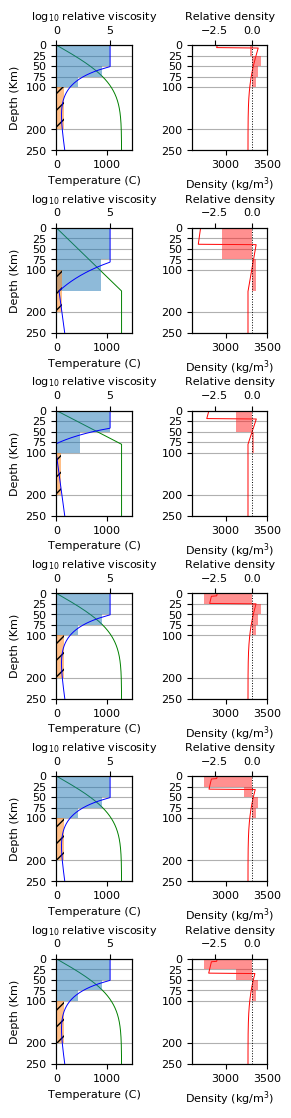

In [26]:
figure1, axs = pyplot.subplots(6,2,figsize=((7/2.54, 28/2.54)))
#figure1.suptitle('Half-space cooling - {} Oceanic Lithosphere'.format(age.to('Myear')), fontsize=20)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42


# for back arc
#height=((layers.magnitude[1] - layers.magnitude[0])/1e3,(layers.magnitude[2] - layers.magnitude[1])/1e3)
for i in range(0,6):
    height = (layers[i].magnitude[2] - layers[i].magnitude[1])/1e3
    # Temperature and Viscosity profiles

    tempPlot = axs[i][0]
    tempPlot.tick_params(axis = 'both', which = 'major', labelsize =8) 
    tempPlot.plot(temperature[i].to('degC'), depth[i].to('kilometer'), color='green', linestyle='solid', linewidth=0.7, label='')
    
    tempPlot.set_ylabel('Depth (Km)',size=8)
    tempPlot.set_xlim(0,1500)
    tempPlot.set_ylim(250, 0)
    tempPlot.set_yticks([0,25,50,75,100,200,250])
    tempPlot.grid(axis='y')

    viscPlot = tempPlot.twiny()
    viscPlot.tick_params(axis = 'both', which = 'major', labelsize =8) 
    viscPlot.plot(np.log10(viscosity[i]), depth[i].to('kilometer'), color='blue', linestyle='solid', linewidth=0.7)
    
    viscPlot.set_xlim(0, 7)
    viscPlot.set_ylim(0, 250)
    viscPlot.invert_yaxis()
    viscPlot.barh(layers[i].magnitude[0:-2]/10**3,np.log10(avg_viscosity[i][0:-1]), height=height, left=0.0, alpha=0.5, align="edge")
    viscPlot.barh(100.0, np.log10(avg_viscosity[i][-1]), height=100.0, left=0.0, alpha=0.5, linestyle='solid', hatch='//', align="edge")

    # Density profile
    densityPlot = axs[i][1]
    densityPlot.tick_params(axis = 'both', which = 'major', labelsize =8) 
    densityPlot.plot(density[i], depth[i].to('kilometer'), color='red' , linestyle='solid', linewidth=0.7)
    
    #densityPlot.set_xlim(2800,3500)
    densityPlot.set_xlim(2600,3500)
    densityPlot.set_ylim(0, 250)
    densityPlot.invert_yaxis()
    densityPlot.set_yticks([0,25,50,75,100,200,250])
    densityPlot.grid(axis='y')

    relDensityPlot = densityPlot.twiny()
    relDensityPlot.tick_params(axis = 'both', which = 'major', labelsize =8) 
    
    relDensityPlot.set_xlim(-4.0, 1.0)
    #relDensityPlot.set_xlim(-0.2, 0.61)
    relDensityPlot.axvline(x=0, ymin=0, ymax=1, linestyle='dotted', color='black',linewidth=0.7)
    relDensityPlot.set_ylim(250,0)
    relDensityPlot.barh(layers[i][0:-2]/10**3,avg_density[i][0:-1], height=height, left=0.0, alpha=0.5, color='#FF2222', align="edge")
    #relDensityPlot.barh(100.0, avg_density[4], height=100.0, left=0.0, alpha=0.5, fill='false', color='#FF2222', hatch='//', align="edge")
    
    relDensityPlot.set_xlabel('Relative density',size=8)
    viscPlot.set_xlabel('log$_{10}$ relative viscosity',size=8)
    densityPlot.set_xlabel('Density (kg/m$^3$)',size=8)
    tempPlot.set_xlabel('Temperature (C)',size=8)
    #Labels condition
#     if i<1:
#         relDensityPlot.set_xlabel('Relative density',size=8)
#         viscPlot.set_xlabel('log$_{10}$ relative viscosity',size=8)
#     else:
#         viscPlot.set_xticks([])
#         relDensityPlot.set_xticks([])
#     if i==5:
#         densityPlot.set_xlabel('Density (kg/m$^3$)',size=8)
#         tempPlot.set_xlabel('Temperature (C)',size=8)
#     else:
#         densityPlot.set_xticks([])
#         tempPlot.set_xticks([])
    
    figure1.tight_layout(pad=0.15,h_pad=0.02,w_pad=0.3)
    #pyplot.subplots_adjust(wspace=0.7, hspace=0.1)
%matplotlib
figure1

In [27]:
figure1.savefig('/home/jovyan/user_data/Figs_PDF_Final/Fig4_raw.pdf')